In [85]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [86]:
df = pd.read_excel(r'C:\Users\GabrielMedina\Desktop\Gitizin\tabela_aluguel_studios.xlsx')
df.head()

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
1,10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00
2,16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78
3,19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29
4,23,2472749891,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,0,850,3500,41,1,1,1,1,85.37


In [87]:
df.shape

(47587, 16)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47587 entries, 0 to 47586
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        47587 non-null  int64  
 1   Id_Oferta         47587 non-null  int64  
 2   Portal            47587 non-null  object 
 3   Bairro            47587 non-null  object 
 4   Zona              47587 non-null  object 
 5   Cidade            47587 non-null  object 
 6   Status            47587 non-null  object 
 7   Valor_Iptu        47587 non-null  int64  
 8   Valor_Condominio  47587 non-null  int64  
 9   Valor_Aluguel     47587 non-null  int64  
 10  Area_Privativa    47587 non-null  int64  
 11  Dormitorios       47587 non-null  int64  
 12  Suites            47587 non-null  int64  
 13  Vagas             47587 non-null  int64  
 14  Banheiros         47587 non-null  int64  
 15  Aluguel_m2        47584 non-null  float64
dtypes: float64(1), int64(10), object(5)
memo

In [89]:
df.isna().any().sum()

1

In [90]:
df.dropna(inplace=True)
df.isna().any().sum()

0

In [91]:
dfrpb = df[df['Bairro'] == 'República']
dfrpb

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
118,657,2476330141,Zap Imóveis,República,Centro,São Paulo,Aluguel,0,420,1535,30,1,0,0,1,51.17
449,2463,2476940784,Zap Imóveis,República,Centro,São Paulo,Aluguel,67,200,1750,23,1,1,0,1,76.09
826,4391,2475545380,Zap Imóveis,República,Centro,São Paulo,Aluguel,33,348,1850,21,1,0,0,1,88.10
1050,5585,2476591214,Zap Imóveis,República,Centro,São Paulo,Aluguel,80,200,1500,24,1,1,0,1,62.50
1457,7917,2475585090,Zap Imóveis,República,Centro,São Paulo,Aluguel,165,580,2155,48,1,0,1,1,44.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47004,224648,2499813475,Zap Imóveis,República,Centro,São Paulo,Aluguel,150,750,3200,38,1,0,0,1,84.21
47145,225248,2500058667,Zap Imóveis,República,Centro,São Paulo,Aluguel,0,0,2200,37,1,0,0,1,59.46
47293,225930,2500210730,Zap Imóveis,República,Centro,São Paulo,Aluguel,250,490,2000,42,1,0,1,1,47.62
47464,226750,2500381106,Zap Imóveis,República,Centro,São Paulo,Aluguel,73,431,2150,33,1,0,0,1,65.15


In [92]:
dfrpb['Area_Privativa'].describe()

count    363.000000
mean      40.234160
std       15.656278
min       10.000000
25%       30.000000
50%       38.000000
75%       44.500000
max      172.000000
Name: Area_Privativa, dtype: float64

In [93]:
dfrpb['Aluguel_m2'].describe()

count    363.000000
mean      49.094904
std       20.866530
min       12.780000
25%       29.945000
50%       46.400000
75%       66.670000
max      116.670000
Name: Aluguel_m2, dtype: float64

<Figure size 2160x720 with 0 Axes>

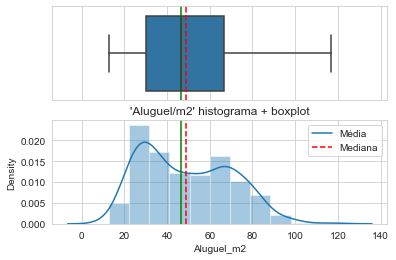

In [112]:
# Verificando a distribuição dos dados na tabela antes de tratada

aluguelm2 = dfrpb.Aluguel_m2
plt.figure(figsize=(30,10))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (2.0, 2.2)})
mean=np.array(aluguelm2).mean()
median=np.median(aluguelm2)
sns.boxplot(aluguelm2, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(aluguelm2, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Média':mean,'Mediana':median})
plt.title("'Aluguel/m2' histograma + boxplot")
ax_box.set(xlabel='')
plt.show()

In [94]:
# Analisando os limites inefriores e superiores das variáveis de aluguel e área

In [95]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amp = q3 - q1
    lim_inf = q1 - 1.5 * amp
    lim_sup = q3 + 1.5 * amp
    return lim_inf, lim_sup

In [96]:
limites(dfrpb['Area_Privativa'])

(8.25, 66.25)

In [97]:
limites(dfrpb['Aluguel_m2'])

(-25.142500000000005, 121.75750000000001)

In [98]:
limites(dfrpb['Valor_Aluguel'])

(-140.0, 3700.0)

In [99]:
# Coletando a mediana e o Q3 da tabela df para cercear o estudo nos imóveis entre os Q2 e Q3

medrpb = np.percentile(dfrpb.Aluguel_m2, 50)
q3rpb = np.percentile(dfrpb.Aluguel_m2, 75)
print(medrpb)
print(q3rpb)

46.4
66.67


In [100]:
rpb_ = dfrpb[(dfrpb.Aluguel_m2 >= medrpb) & (dfrpb.Aluguel_m2 <= q3rpb)]
df_rpb = pd.DataFrame(data=rpb_)
display(df_rpb)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
118,657,2476330141,Zap Imóveis,República,Centro,São Paulo,Aluguel,0,420,1535,30,1,0,0,1,51.17
1050,5585,2476591214,Zap Imóveis,República,Centro,São Paulo,Aluguel,80,200,1500,24,1,1,0,1,62.50
1650,8958,2477468207,Zap Imóveis,República,Centro,São Paulo,Aluguel,0,324,2500,39,1,0,1,1,64.10
2663,14164,2476614423,Viva Real,República,Centro,São Paulo,Aluguel,84,392,2300,36,1,0,1,1,63.89
3048,15934,2477448326,Viva Real,República,Centro,São Paulo,Aluguel,0,325,2500,39,1,0,1,1,64.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46939,224422,2499648374,Zap Imóveis,República,Centro,São Paulo,Aluguel,70,490,2040,42,1,1,1,2,48.57
47145,225248,2500058667,Zap Imóveis,República,Centro,São Paulo,Aluguel,0,0,2200,37,1,0,0,1,59.46
47293,225930,2500210730,Zap Imóveis,República,Centro,São Paulo,Aluguel,250,490,2000,42,1,0,1,1,47.62
47464,226750,2500381106,Zap Imóveis,República,Centro,São Paulo,Aluguel,73,431,2150,33,1,0,0,1,65.15


In [101]:
df_rpb['Area_Privativa'].describe()

count    99.000000
mean     36.383838
std       9.993577
min      23.000000
25%      29.500000
50%      36.000000
75%      42.000000
max      70.000000
Name: Area_Privativa, dtype: float64

In [102]:
# CALCULANDO O LIMITE SUPERIOR DA ÁREA E INTERQUARTIL DO DATASET

areap = limites(df_rpb['Area_Privativa'])
areap

(10.75, 60.75)

In [103]:
df_rpb = df_rpb[df_rpb.Area_Privativa <= areap[1]]
df_rpb

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
118,657,2476330141,Zap Imóveis,República,Centro,São Paulo,Aluguel,0,420,1535,30,1,0,0,1,51.17
1050,5585,2476591214,Zap Imóveis,República,Centro,São Paulo,Aluguel,80,200,1500,24,1,1,0,1,62.50
1650,8958,2477468207,Zap Imóveis,República,Centro,São Paulo,Aluguel,0,324,2500,39,1,0,1,1,64.10
2663,14164,2476614423,Viva Real,República,Centro,São Paulo,Aluguel,84,392,2300,36,1,0,1,1,63.89
3048,15934,2477448326,Viva Real,República,Centro,São Paulo,Aluguel,0,325,2500,39,1,0,1,1,64.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46939,224422,2499648374,Zap Imóveis,República,Centro,São Paulo,Aluguel,70,490,2040,42,1,1,1,2,48.57
47145,225248,2500058667,Zap Imóveis,República,Centro,São Paulo,Aluguel,0,0,2200,37,1,0,0,1,59.46
47293,225930,2500210730,Zap Imóveis,República,Centro,São Paulo,Aluguel,250,490,2000,42,1,0,1,1,47.62
47464,226750,2500381106,Zap Imóveis,República,Centro,São Paulo,Aluguel,73,431,2150,33,1,0,0,1,65.15


<Figure size 2160x720 with 0 Axes>

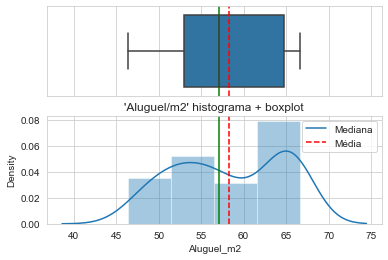

In [113]:
# Verificando a distribuição dos dados na tabela processada


aluguelm2 = df_rpb.Aluguel_m2
plt.figure(figsize=(30,10))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1.0, 1.2)})
mean=np.array(aluguelm2).mean()
median=np.median(aluguelm2)
sns.boxplot(aluguelm2, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(aluguelm2, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Mediana':median,'Média':mean})
plt.title("'Aluguel/m2' histograma + boxplot")
ax_box.set(xlabel='')
plt.show()

Distribuição levemente assimétrica com a média maior que a mediana. Inclinação positiva

<Figure size 1440x720 with 0 Axes>

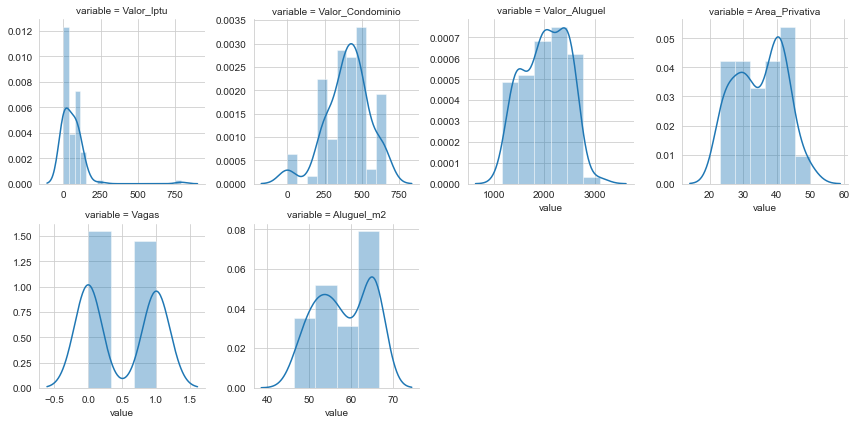

In [114]:
# Verificando a distribuição por histogramas das variáveis numéricas

def hist_col_num(df, col_num):
    '''
    Pega o dataframe, as colunas numéricas como lista
    Retorna um grupo de histogramas com  elas
    
    '''
    f = pd.melt(df, value_vars=col_num) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

plt.figure(figsize=(20,10))
hist_col_num(df_rpb, df_rpb[['Valor_Iptu', 'Valor_Condominio', 'Valor_Aluguel', 'Area_Privativa', 'Vagas', 'Aluguel_m2']])

In [105]:
# Agrupamento das métricas correspondentes a cada metragem quadrada do imóvel e o aluguel/m²

datarpb = df_rpb.groupby(['Area_Privativa']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
datarpb.replace(np.nan, 0, inplace=True)
display(datarpb)

,min,max,mean,std,size
Area_Privativa,,,,,
23,58.70,63.04,60.870000,3.068843,2
24,56.25,66.67,61.001000,4.556540,10
25,46.40,66.00,55.466667,9.881970,3
26,50.00,54.69,52.203333,2.357803,3
28,51.79,64.29,55.807500,5.900104,4
29,62.79,65.52,64.380000,1.419542,3
30,50.00,66.67,61.813750,7.032648,8
31,46.77,58.06,52.146667,5.664100,3
32,53.12,60.97,56.412500,3.309243,4


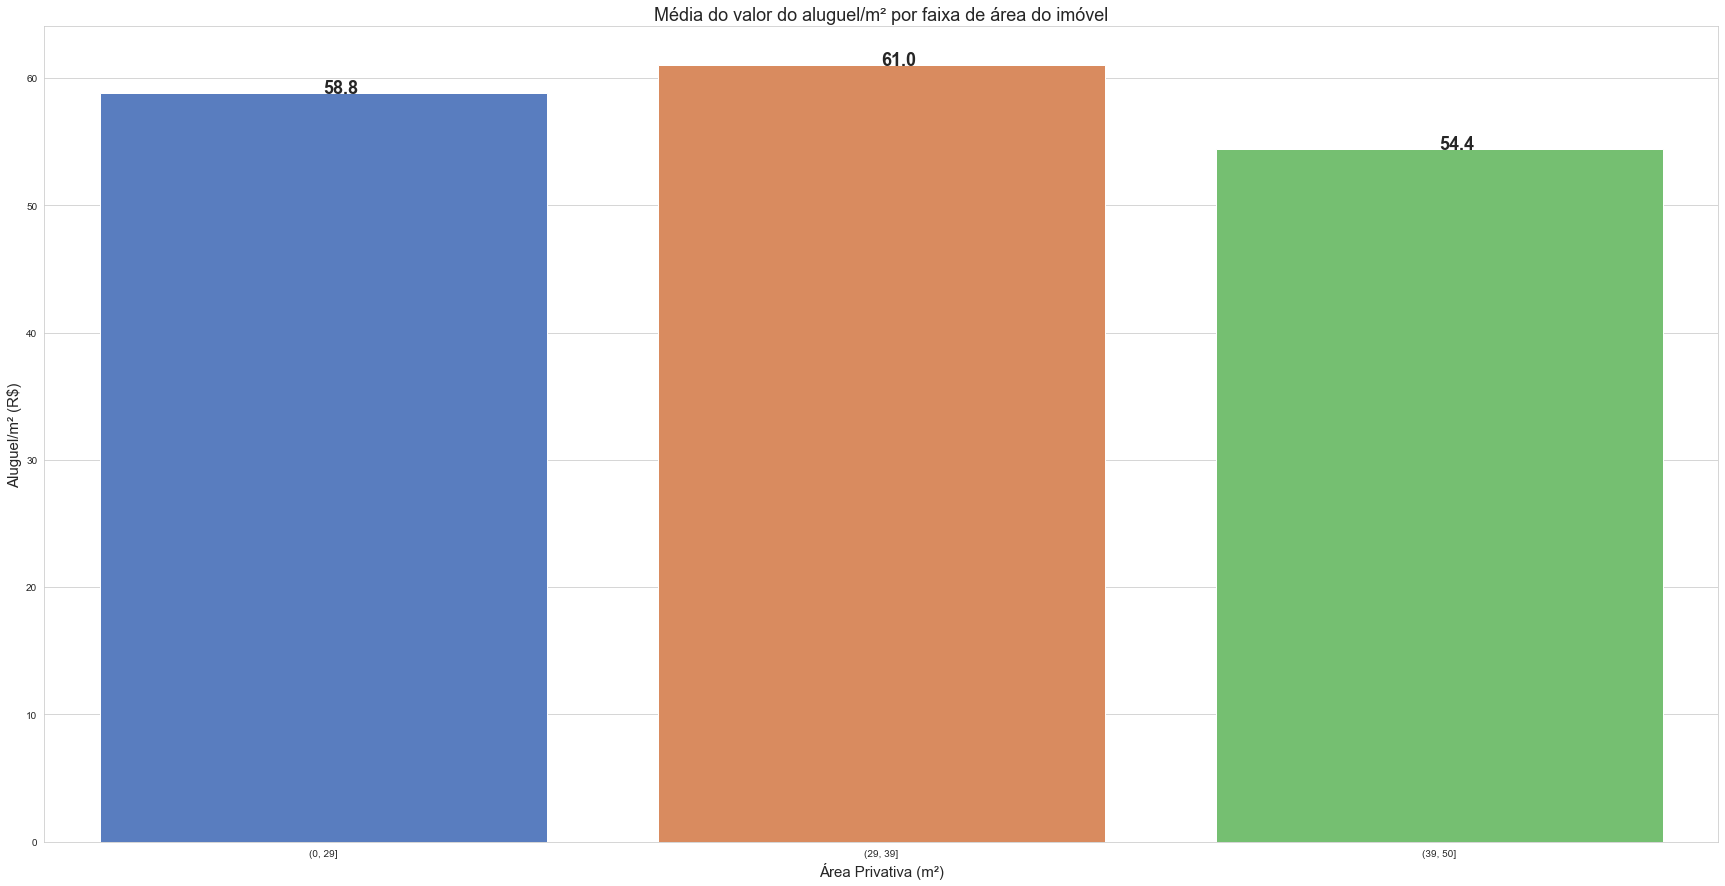

In [116]:
# Agrupando as médias de aluguel/m² em faixas de área privativa

dfbx = df_rpb.groupby(pd.cut(df_rpb['Area_Privativa'], [0, 29, 39, 50])).agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)

# Verificando a média de aluguel por m2 por faixas de área privativa

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=dfbx.index, y='media', data=dfbx, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por faixa de área do imóvel", fontsize=18)
ax.set_xlabel("Área Privativa (m²)", fontsize=15)
ax.set_ylabel("Aluguel/m² (R$)", fontsize=15)

# calculando médias e plotando no barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), fontsize = 18, weight='bold' )

In [106]:
# Agrupamento das métricas correspondentes a cada metragem quadrada do imóvel e o aluguel total

datarpb_ = df_rpb.groupby(['Area_Privativa']).Valor_Aluguel.agg(['min', 'max', 'mean', 'std', 'size'])
datarpb_.replace(np.nan, 0, inplace=True)
display(datarpb_)

,min,max,mean,std,size
Area_Privativa,,,,,
23,1350,1450,1400.000000,70.710678,2
24,1350,1600,1464.000000,109.336382,10
25,1160,1650,1386.666667,247.049253,3
26,1300,1422,1357.333333,61.329710,3
28,1450,1800,1562.500000,165.201897,4
29,1821,1900,1867.000000,41.073106,3
30,1500,2000,1854.375000,210.974567,8
31,1450,1800,1616.666667,175.594229,3
32,1700,1951,1805.250000,105.815484,4


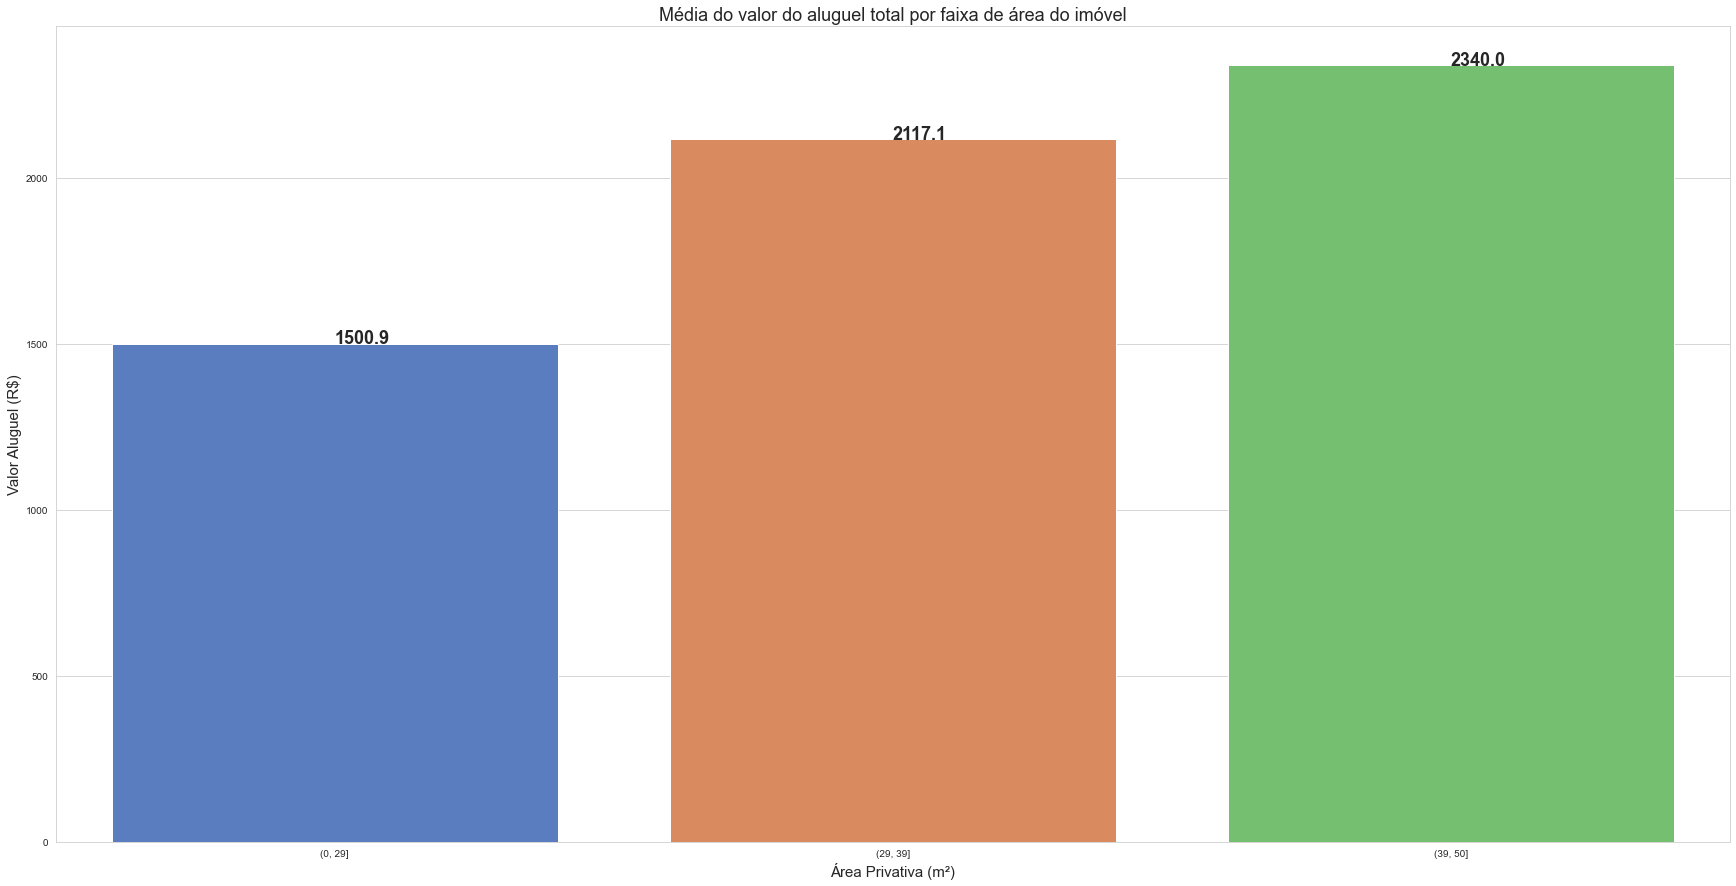

In [117]:
# Agrupando as médias de aluguel em faixas de área privativa

dfbx_ = df_rpb.groupby(pd.cut(df_rpb['Area_Privativa'], [0, 29, 39, 50])).agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)

# Verificando a média de aluguel por faixas de área privativa

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=dfbx_.index, y='media', data=dfbx_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel total por faixa de área do imóvel", fontsize=18)
ax.set_xlabel("Área Privativa (m²)", fontsize=15)
ax.set_ylabel("Valor Aluguel (R$)", fontsize=15)

# calculando médias e plotando no barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), fontsize = 18, weight='bold' )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '23'),
  Text(1, 0, '24'),
  Text(2, 0, '25'),
  Text(3, 0, '26'),
  Text(4, 0, '28'),
  Text(5, 0, '29'),
  Text(6, 0, '30'),
  Text(7, 0, '31'),
  Text(8, 0, '32'),
  Text(9, 0, '33'),
  Text(10, 0, '34'),
  Text(11, 0, '35'),
  Text(12, 0, '36'),
  Text(13, 0, '37'),
  Text(14, 0, '39'),
  Text(15, 0, '40'),
  Text(16, 0, '41'),
  Text(17, 0, '42'),
  Text(18, 0, '44'),
  Text(19, 0, '45'),
  Text(20, 0, '48'),
  Text(21, 0, '50')])

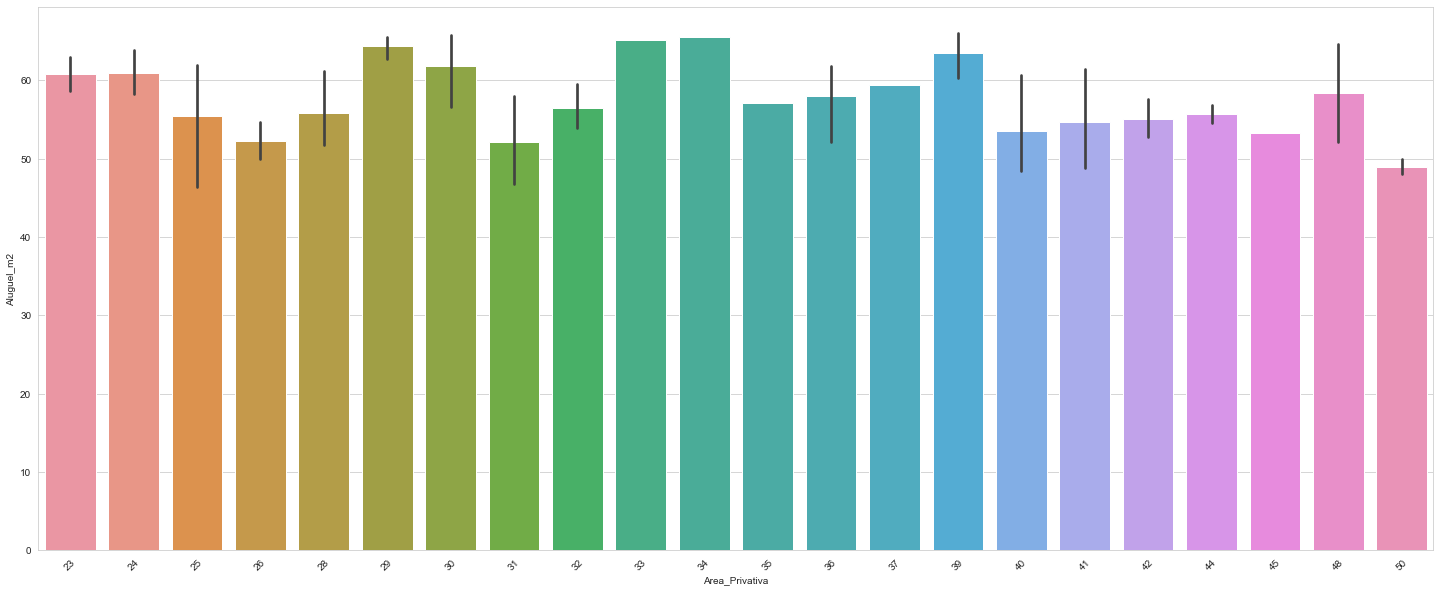

In [109]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_rpb['Area_Privativa'], y = df_rpb['Aluguel_m2'])
plt.xticks(rotation=45)

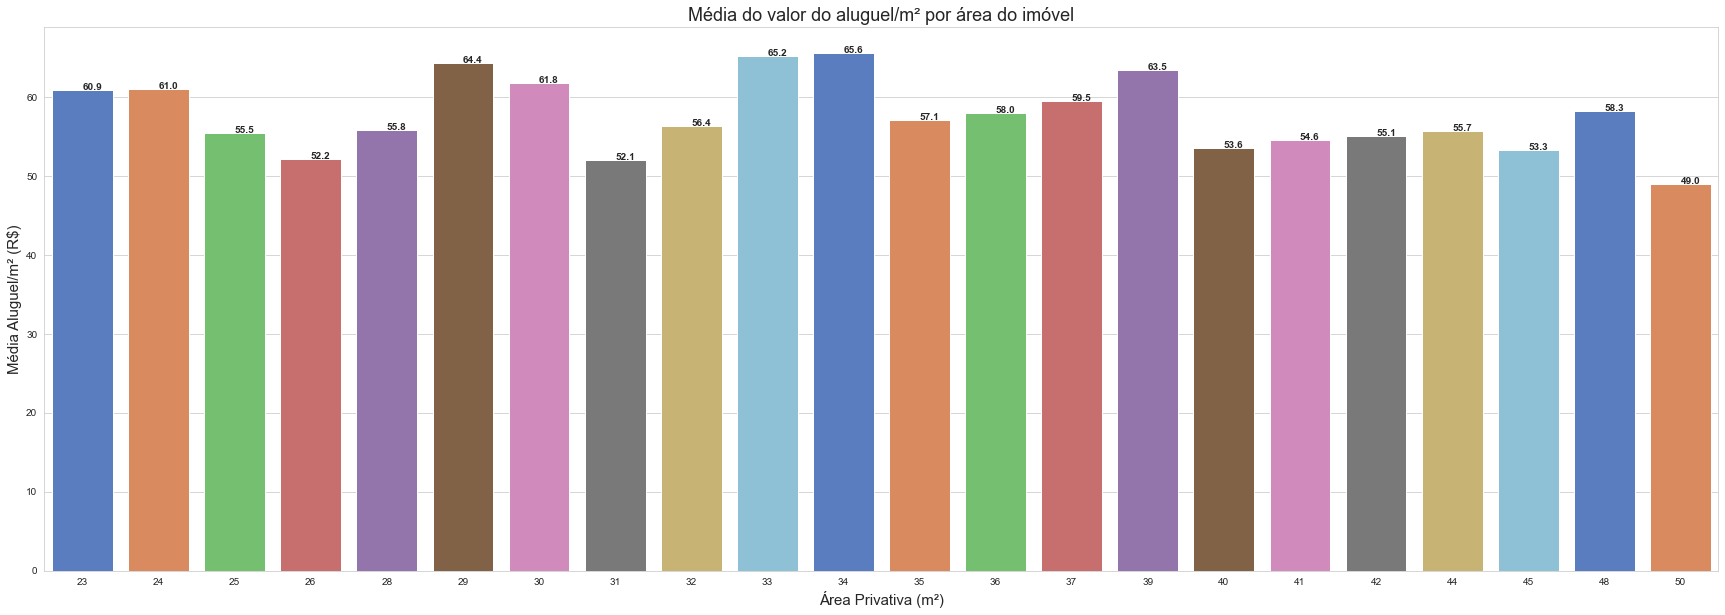

In [110]:
data_rpb = df_rpb.groupby('Area_Privativa').agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x=data_rpb.index, y='media', data=data_rpb, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Média Aluguel/m² (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )

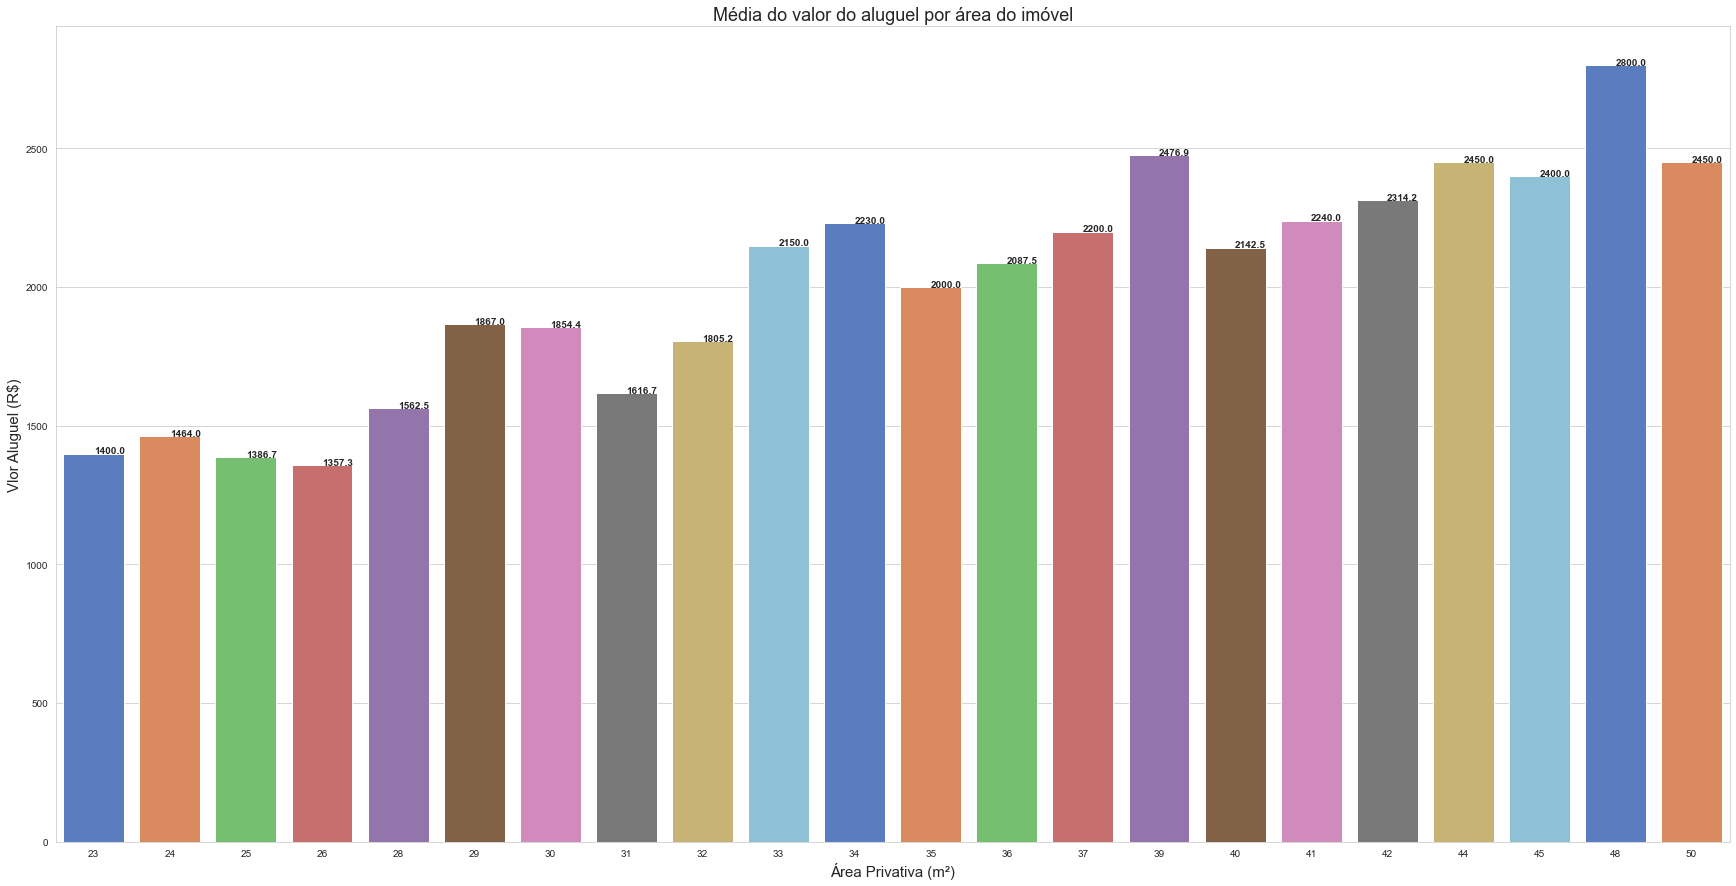

In [111]:
data_rpb_ = df_rpb.groupby('Area_Privativa').agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=data_rpb_.index, y='media', data=data_rpb_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Vlor Aluguel (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )